In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import time
%matplotlib inline
import h5py
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Convolution2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

from sklearn.metrics import confusion_matrix
from keras.utils.vis_utils import model_to_dot

import tensorflow as tf
tf.set_random_seed(1)

/Users/julia/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def create_datagens(img_width, img_height, batch_size, train_dir, valid_dir):
    # Data Generators
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    valid_datagen = ImageDataGenerator(
        rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size = batch_size)

    valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size)
    
    return train_generator, valid_generator

In [3]:
# parameters
img_width = 150
img_height = 150

train_dir = 'clean2/train/'
valid_dir = 'clean2/valid/'
test_dir = 'clean2/test/'

batch_size = 32
epochs = 20
num_classes=3

n_train = len(os.listdir(train_dir))
n_valid = len(os.listdir(valid_dir))

# preprocessing
train_generator, valid_generator = create_datagens(img_width, img_height, batch_size, train_dir, valid_dir)

print(len(train_generator))

train_generator[1][0][0][0]
train_generator.class_indices
# train_generator.y

# network layout
# model, name = define_network(img_width, img_height)

Found 1340 images belonging to 3 classes.
Found 235 images belonging to 3 classes.
42


{'Aussenansicht': 0, 'Grundriss': 1, 'Innenansicht': 2}

In [4]:
### Define the network

In [5]:
model = Sequential()
name = 'cnn_wohnungsbilder3Classes2'

model.add(Convolution2D(32, (5, 5),padding='same',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(32, (5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Convolution2D(32, (5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(64, (3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(64, (3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(300))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
activation_2 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
__________

In [7]:
# setup tensorboard
tensorboard = keras.callbacks.TensorBoard(
        log_dir='tensorboard/' + name + '/', 
        write_graph=True,
        histogram_freq=0)

#save model after every 10 epochs 
savedir = "checkpoints/"+name+"/"
os.makedirs(savedir,exist_ok=True)       
checkpointer = keras.callbacks.ModelCheckpoint( 
        filepath =  savedir+"weights_epoch_{epoch:03d}-{val_loss:.2f}.hdf5",
        verbose = 1, 
        save_best_only = False,
        period = 10 )

In [8]:
# run training
history = model.fit_generator(
    generator=train_generator,
    epochs=epochs,
    validation_data=valid_generator)

Epoch 1/20
42/42 [==============================] - 1854s 44s/step - loss: 0.3816 - acc: 0.8717 - val_loss: 0.7916 - val_acc: 0.7489
Epoch 2/20
42/42 [==============================] - 1666s 40s/step - loss: 0.2144 - acc: 0.9322 - val_loss: 0.4492 - val_acc: 0.8426
Epoch 3/20
42/42 [==============================] - 1475s 35s/step - loss: 0.1950 - acc: 0.9433 - val_loss: 0.7193 - val_acc: 0.7277
Epoch 4/20
42/42 [==============================] - 1853s 44s/step - loss: 0.1985 - acc: 0.9448 - val_loss: 0.5977 - val_acc: 0.7915
Epoch 5/20
42/42 [==============================] - 2173s 52s/step - loss: 0.1702 - acc: 0.9516 - val_loss: 0.2711 - val_acc: 0.9191
Epoch 6/20
42/42 [==============================] - 2569s 61s/step - loss: 0.1686 - acc: 0.9507 - val_loss: 1.8862 - val_acc: 0.6213
Epoch 7/20
42/42 [==============================] - 2193s 52s/step - loss: 0.1554 - acc: 0.9567 - val_loss: 0.4575 - val_acc: 0.8511
Epoch 8/20
42/42 [==============================] - 2222s 53s/step - 

Model 3 Classes


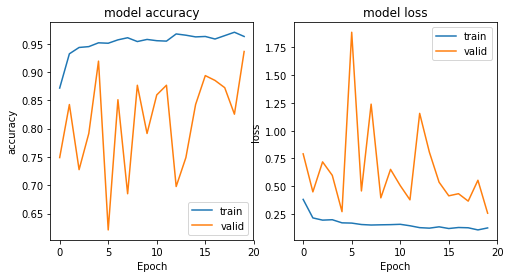

In [111]:
print('Model 3 Classes')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="lower right")


plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train", "valid"], loc="upper right")
plt.show()

In [10]:
from keras.models import load_model
model = load_model("checkpoints/cnn_dg_5c2d/weights_epoch_020_val_loss_1.31")
savedir+"weights_epoch_{epoch:03d}-{val_loss:.2f}.hdf5"

OSError: Unable to open file (Unable to open file: name = 'checkpoints/cnn_dg_5c2d/weights_epoch_020_val_loss_1.31', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [13]:
test_files_aussenansicht = os.listdir("clean2/test/Aussenansicht")
# test_files_bad = os.listdir("clean2/test/Bad")
#test_files_bad = test_files_bad[0:2]
#test_files_bad
# test_files_divers = os.listdir("clean/Test/Divers")
test_files_grundriss = os.listdir("clean2/test/Grundriss")
test_files_innenansicht = os.listdir("clean2/test/Innenansicht")
# test_files_kueche = os.listdir("clean2/test/Küche")

In [14]:
# no of test images
np.sum([73, 44, 21, 16, 83, 34])

271

In [55]:
from PIL import Image
from PIL import *
import PIL
import PIL.Image
from numpy import array

X_test = []

for i in test_files_aussenansicht:
    img=tf.keras.preprocessing.image.load_img("clean2/test/Aussenansicht/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)
    
    
for i in test_files_grundriss:
    img=tf.keras.preprocessing.image.load_img("clean2/test/Grundriss/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)
    
for i in test_files_innenansicht:
    img=tf.keras.preprocessing.image.load_img("clean2/test/Innenansicht/" + i, target_size=(img_width,img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)/255
    X_test.append(img)

X_test = np.asarray(X_test)
X_test.shape
#X_test[1]

(252, 150, 150, 3)

In [78]:
Y_test = []

for i in test_files_aussenansicht:
    Y_test.append(0)
    
# for i in test_files_bad:
#     Y_test.append(1)

# for i in test_files_divers:
#     Y_test.append(2)

for i in test_files_grundriss:
    Y_test.append(1)

for i in test_files_innenansicht:
    Y_test.append(2)

# for i in test_files_kueche:
#     Y_test.append(4)

Y_test = np.asarray(Y_test)
print(Y_test.shape)
Y_test[:]

(252,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
preds_test = model.predict(X_test)
preds_test[0:5]

array([[9.2908347e-01, 2.2644952e-05, 7.0893966e-02],
       [7.0892072e-01, 1.1821369e-02, 2.7925789e-01],
       [8.6665547e-01, 9.1383357e-05, 1.3325313e-01],
       [1.9503847e-01, 6.9933985e-03, 7.9796815e-01],
       [1.4399244e-03, 6.5926556e-04, 9.9790084e-01]], dtype=float32)

In [89]:
predicted_classes=np.argmax(np.round(preds_test),axis=1)

In [90]:
predicted_classes.shape, Y_test.shape

((252,), (252,))

In [91]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Found 235 correct labels


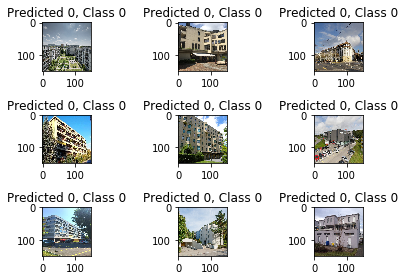

In [106]:
correct = np.where(predicted_classes==Y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
    plt.tight_layout()

Found 17 incorrect labels


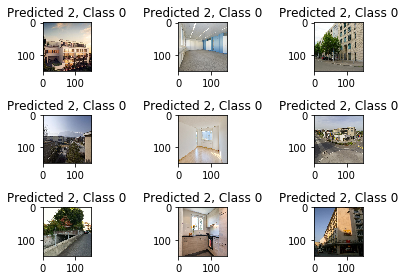

In [104]:
incorrect = np.where(predicted_classes!=Y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))
    plt.tight_layout()

In [108]:
##Classification Report

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
# print(target_names)
print('Classification report - 3 Classes')
print(classification_report(Y_test, predicted_classes, target_names=target_names))

Classification report - 3 Classes
             precision    recall  f1-score   support

    Class 0       0.97      0.81      0.88        73
    Class 1       1.00      0.91      0.95        11
    Class 2       0.92      0.99      0.95       168

avg / total       0.94      0.93      0.93       252



In [95]:
Y_test[:] == np.argmax(preds_test,axis=1)

array([ True,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [112]:
print ('Model 3 Classes')
print(confusion_matrix(Y_test[:],np.argmax(preds_test,axis=1)))
print("Acc = " ,np.sum(Y_test[:]==np.argmax(preds_test,axis=1))/len(preds_test))

Model 3 Classes
[[ 58   0  15]
 [  0  10   1]
 [  2   0 166]]
Acc =  0.9285714285714286


In [97]:
sorted(os.listdir("clean/test"))

['.DS_Store',
 '003a3ed6-3962-426e-a888-307e84fa6aa7.jpg',
 '006eaa95-ff9c-4585-b022-b7aa96a1a3f0.jpg',
 '00bfd75f-c895-4b40-a0e7-2f0ccdd0d961.jpg',
 '00c42b5c-727b-4c95-94c2-2faec0871078.jpg',
 '00ce326e-7898-45d2-b134-b72332bee52e.jpg',
 '00d09803-e199-4447-bc9e-ab9d1c9c87aa.jpg',
 '01b497c6-0741-4b3a-8afb-aa4320a728fc.jpg',
 '01b6a2f4-8a20-4f69-829b-18529cec8ed7.jpg',
 '01fb74f6-339d-4f9a-8b3c-c025d5e7d085.jpg',
 '01fdab61-3183-41bd-8fef-7b6b35837034.jpg',
 '02b34af1-d19f-4d23-b0ab-6d00551887a2.jpg',
 '02c08bcc-1c22-4d52-aead-36e681518bb9.jpg',
 '02cc9a2c-f076-40b5-95d5-e2e926bf52ce.jpg',
 '04b512c9-d52b-4fb7-9686-0199d0c71076.jpg',
 '04d5a4b0-1a32-4935-bbbe-dc289ea8025c.jpg',
 '04f5e167-a212-4f08-af66-258852be7ffd.jpg',
 '05ca107c-7707-44a4-a1cc-29a67d9334b9.jpg',
 '05d7db2c-c71f-4fa4-becd-34a2fc75bd60.jpg',
 '05f4f9b0-17e4-42c9-aec6-4073329500e3.jpg',
 '0a0eb257-8f68-4a64-a6f4-07b2b11674ce.jpg',
 '0a1209fe-15f5-4a8e-ae6c-6fcfc76cb68d.jpg',
 '0a41decd-63b5-4a67-8239-5b66f569606f.jp

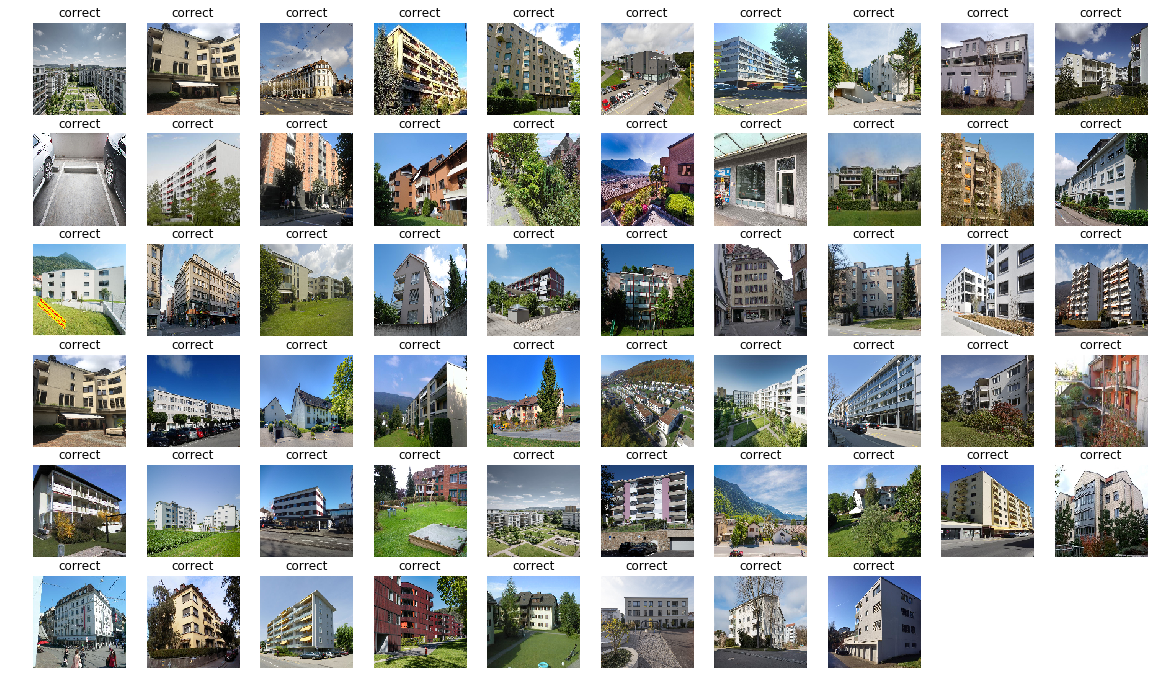

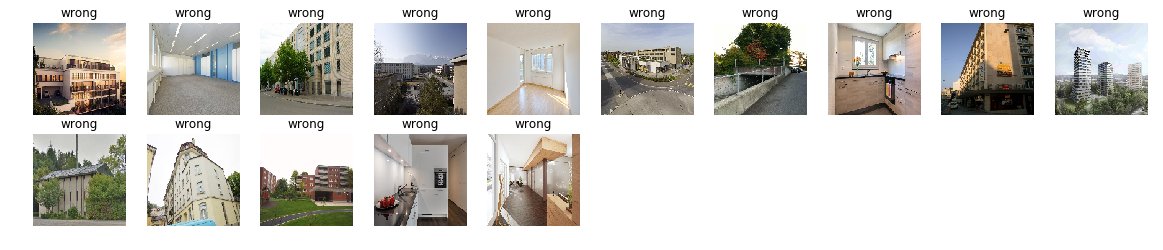

In [98]:
pred = np.argmax(preds_test,axis=1)

Klasse = 0 # Aussenansicht
#Klasse = 1 # Bad
#Klasse = 2 # Divers
#Klasse = 2 # Grundriss
#Klasse = 3 # Innenansicht
#Klasse = 4 # Küche

right = np.where(Y_test[:]==Klasse)[0][np.where(np.in1d(np.where(Y_test[:]==Klasse),np.where(pred[:]==Klasse)))]
wrong = np.where(Y_test[:]==Klasse)[0][(np.in1d(np.where(Y_test[:]==Klasse),np.where(pred[:]==Klasse)))==False]

plt.figure(figsize=(20,20))

for i in range(0,len(right)):
    plt.subplot(10,10,(i+1))
    plt.imshow(np.asarray(X_test[right[i]]))
    plt.axis('off')
    plt.title('correct')
    
plt.figure(figsize=(20,20))

for i in range(0,len(wrong)):
    plt.subplot(10,10,(i+1))
    plt.imshow(np.asarray(X_test[wrong[i]]))
    plt.axis('off')
    plt.title('wrong')